In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from pathlib import Path
import ipywidgets as widgets
import operator
import pandas as pd
from IPython import display
from iarchitect.trainer import Trainer
from iarchitect.common import create_policy_eval_video
from iarchitect.solutions import read_args,make_environment

p = Path.cwd().parents[1] / "iarchitect" / "solutions"
sols = [str(d.name) for d in p.iterdir() if not d.is_file()]

In [33]:
cbox = widgets.Combobox(
    placeholder="Choose Solution",
    options=sols,
    description='Choose Solution:',
    ensure_option=True,
    disabled=False
)
cbox

Combobox(value='', description='Choose Solution:', ensure_option=True, options=('__pycache__', 'Aligned_Row_Bi…

In [45]:
assert cbox.value in sols
psols = p / cbox.value
results = []
results2 = []
for d in psols.iterdir():
    if d.is_file():
        if d.suffix==".png":
            num_res,date,num_step = d.stem.split("_")
            results.append((num_res,date,num_step ))
    if d.is_dir() and d.name[:min(len("policy"),len(d.name))]=="policy":
        date,num_step = d.name.split("_")
        date=date[len("policy"):]
        results2.append((date,num_step))
df = pd.DataFrame(results).sort_values(by=1,ascending=False)
df2 = pd.DataFrame(results2).sort_values(by=1,ascending=False)

cbox2 = widgets.Combobox(
    placeholder="Choose Iteration",
    options=list(df[2].values),
    description='Choose Step:',
    ensure_option=True,
    disabled=False
)
cbox2

Combobox(value='', description='Choose Step:', ensure_option=True, options=('990', '980', '970', '960', '950',…

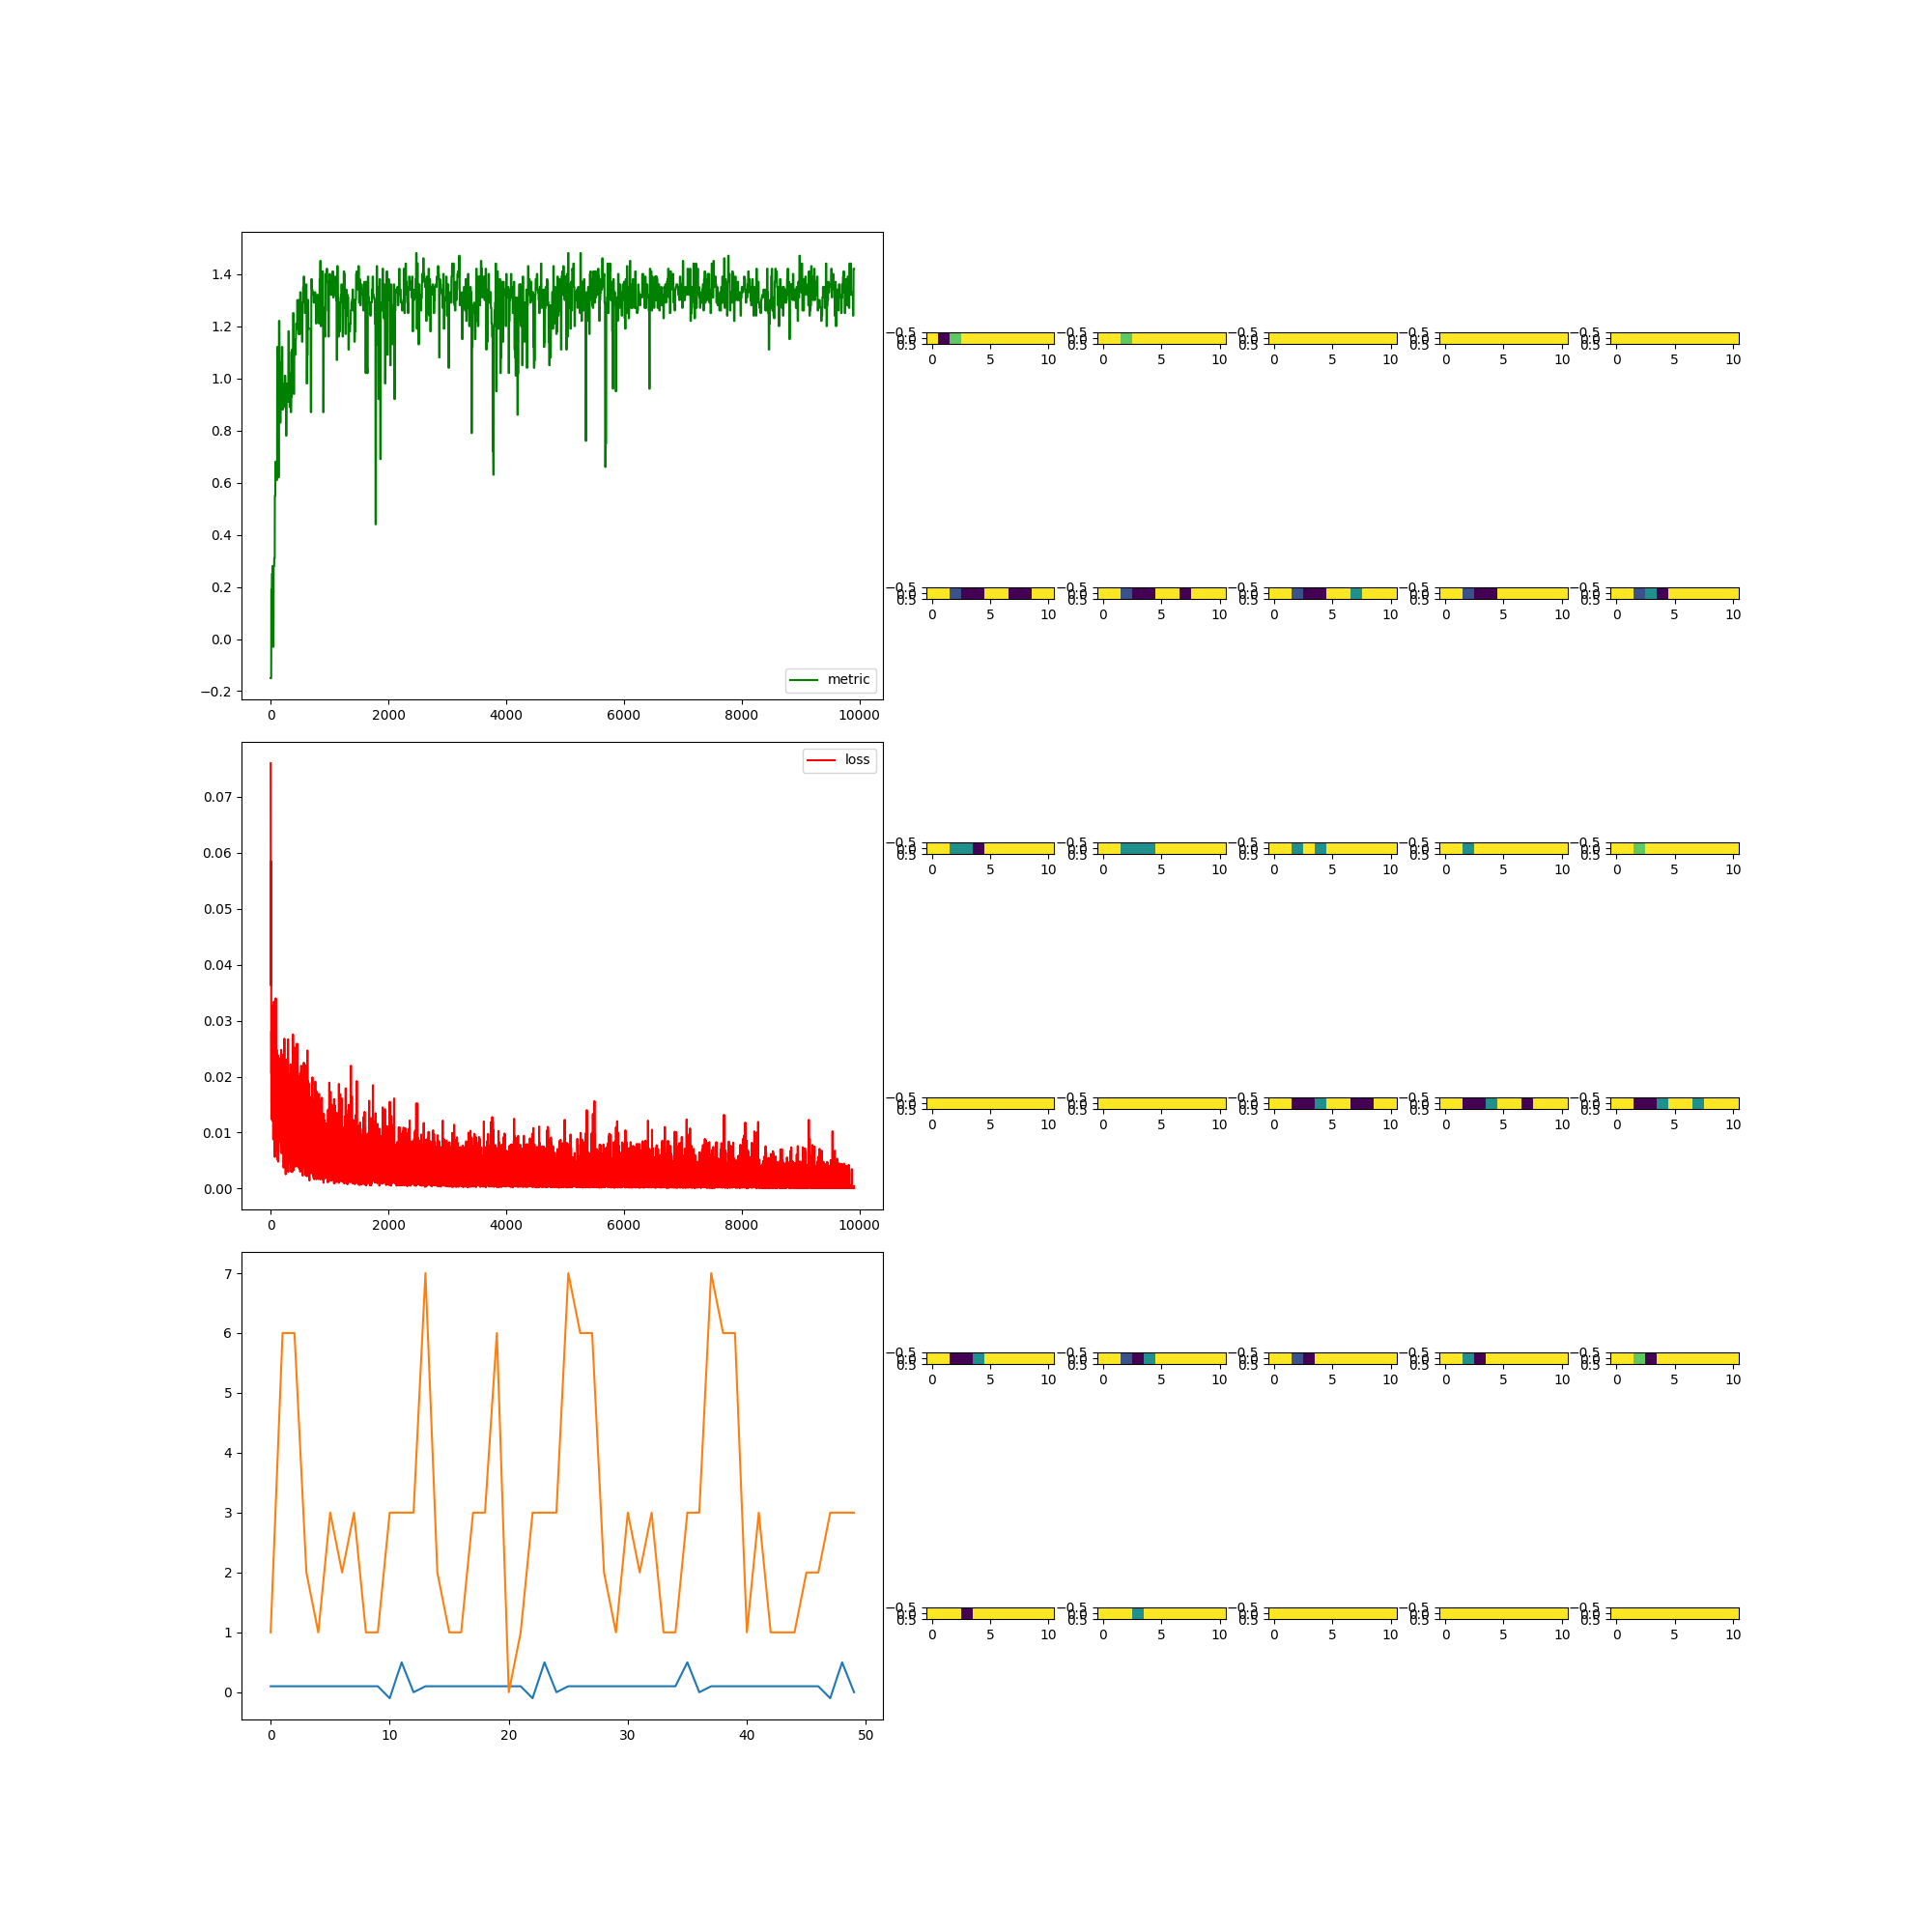

In [46]:
name = "_".join(df[df[2]==cbox2.value].values.flat)
suff = "_".join(df[df[2]==cbox2.value].iloc[0,1:])
policy_folder = "_".join(df2[df2[1]==cbox2.value].iloc[0,:])
display.Image(psols / f"{name}.png")

In [47]:
policy = Trainer.load_policy(str(psols),policy_folder)

/home/maxime/code/mcaox/iarchitect/iarchitect/solutions/WindowEnvWhatPlantGrosReseau_discount0_2_dimension16_resetTrue_maxspe5_str2/policy220308140232_990


In [51]:
args = read_args(psols)
env,tf_env = make_environment(args)

/home/maxime/code/mcaox/iarchitect/iarchitect/solutions/WindowEnvWhatPlantGrosReseau_discount0_2_dimension16_resetTrue_maxspe5_str2/args.json


In [52]:
filename = f"{psols}/behaviour_step{cbox2.value}"
filename

'/home/maxime/code/mcaox/iarchitect/iarchitect/solutions/WindowEnvWhatPlantGrosReseau_discount0_2_dimension16_resetTrue_maxspe5_str2/behaviour_step990'

In [ ]:
create_policy_eval_video(tf_env,env,policy,filename,num_episodes=10,fps=5)